In [1]:
import pandas as pd
import pandas_datareader as pdr
from datetime import datetime

In [2]:
import yfinance as yf
ticker_symbol = 'TSLA'
df_tesla = yf.download(ticker_symbol)

[*********************100%%**********************]  1 of 1 completed


In [5]:
df_tesla

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
...,...,...,...,...,...,...
2024-04-08,169.339996,174.500000,167.789993,172.979996,172.979996,104423300
2024-04-09,172.910004,179.220001,171.919998,176.880005,176.880005,103232700
2024-04-10,173.039993,174.929993,170.009995,171.759995,171.759995,84532400


## Simple Moving Average

<Axes: xlabel='Date'>

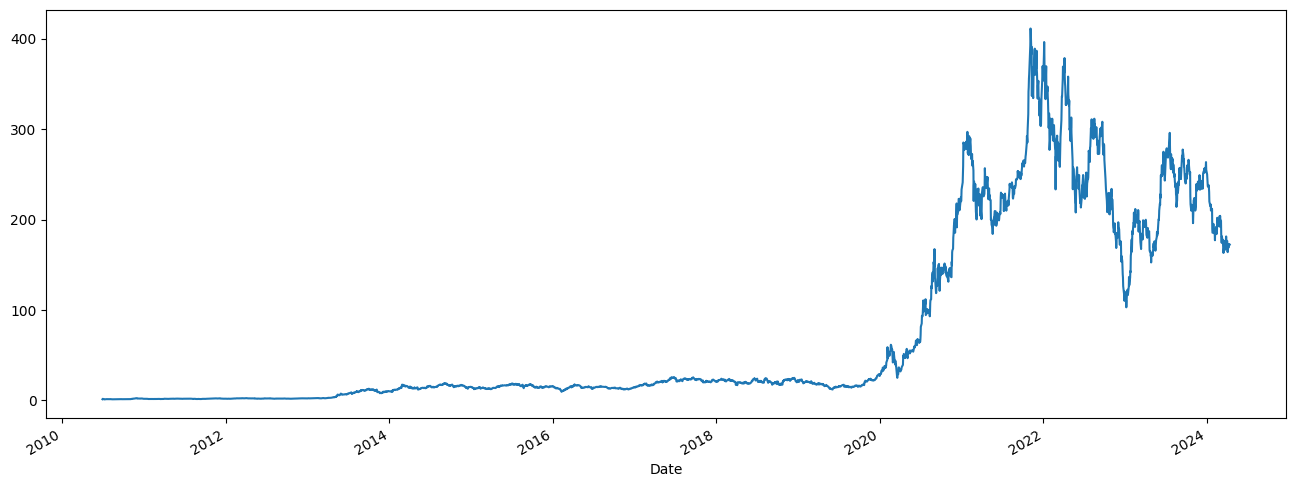

In [8]:
df_tesla['Open'].plot(figsize=(16,6))

In [10]:
df_tesla['Open: 10 days rolling'] = df_tesla['Open'].rolling(window=10,min_periods=1).mean()

<Axes: xlabel='Date'>

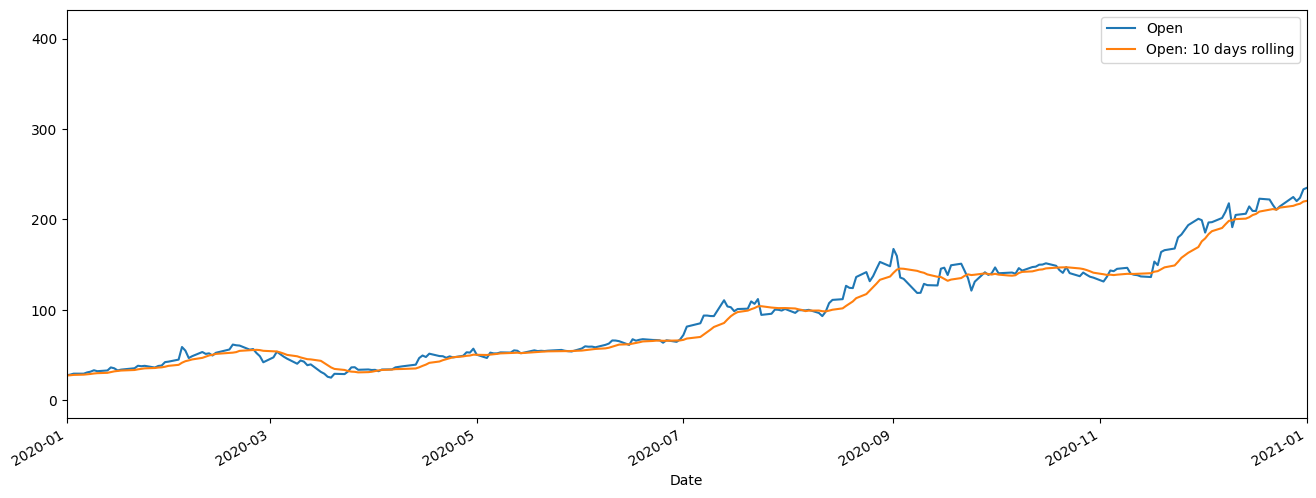

In [15]:
df_tesla[['Open','Open: 10 days rolling']].plot(xlim=['2020-01-01','2021-01-01'],figsize=(16,6))

### Now let's change the rolling window size to 20 and see the graph

In [24]:
df_tesla.head(2)

,Open,High,Low,Close,Adj Close,Volume,Open: 10 days rolling,Open: 20 days rolling,Open: 30 days rolling
Date,,,,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500,1.266667,1.266667,1.266667
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500,1.493000,1.493000,1.493000


In [25]:
df_tesla.drop('Open: 20 days rolling',axis=1,inplace=True)

In [26]:
df_tesla.drop('Open: 30 days rolling',axis=1,inplace=True)

In [27]:
df_tesla.head(2)

,Open,High,Low,Close,Adj Close,Volume,Open: 10 days rolling
Date,,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500,1.266667
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500,1.493000


In [28]:
df_tesla['Open: 30 days rolling'] = df_tesla['Open'].rolling(window=30,min_periods=1).mean()
df_tesla['Open: 50 days rolling'] = df_tesla['Open'].rolling(window=50,min_periods=1).mean()

<Axes: xlabel='Date'>

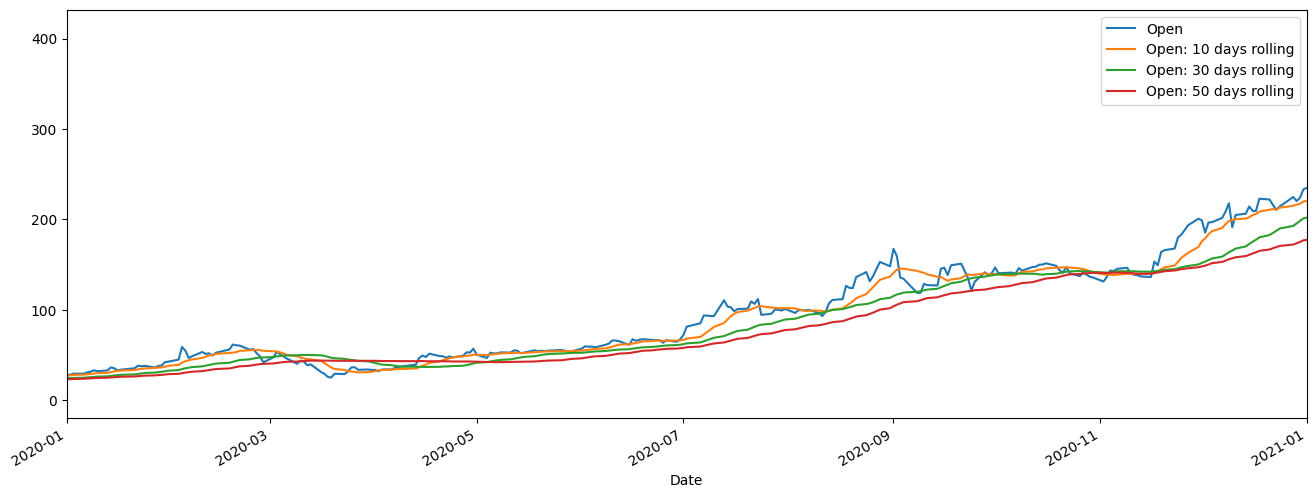

In [29]:
df_tesla[['Open','Open: 10 days rolling','Open: 30 days rolling','Open: 50 days rolling']].plot(xlim=['2020-01-01','2021-01-01'],figsize=(16,6))

## Cumulative Moving Average

### It can be done by using the expanding function

<Axes: xlabel='Date'>

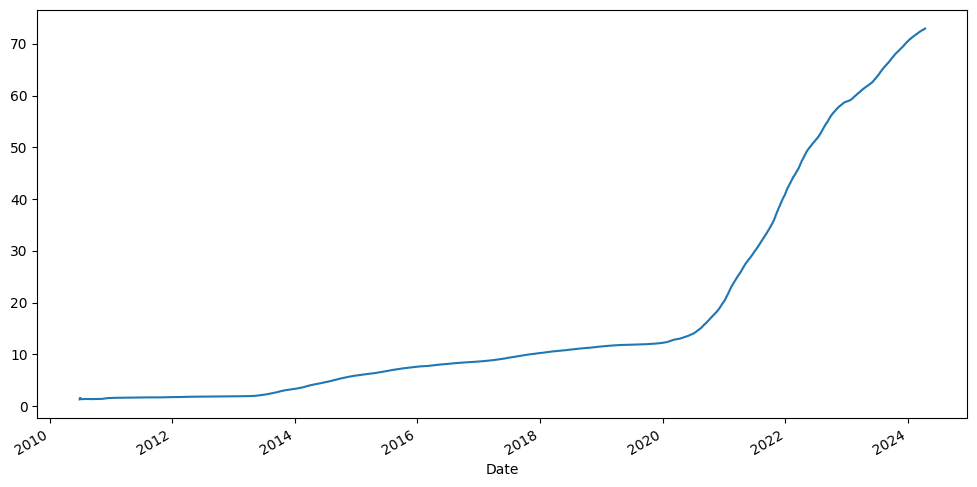

In [30]:
df_tesla['Open'].expanding().mean().plot(figsize=(12,6))

In [33]:
df_tesla['Open expanding'] = df_tesla['Open'].expanding().mean()

<Axes: xlabel='Date'>

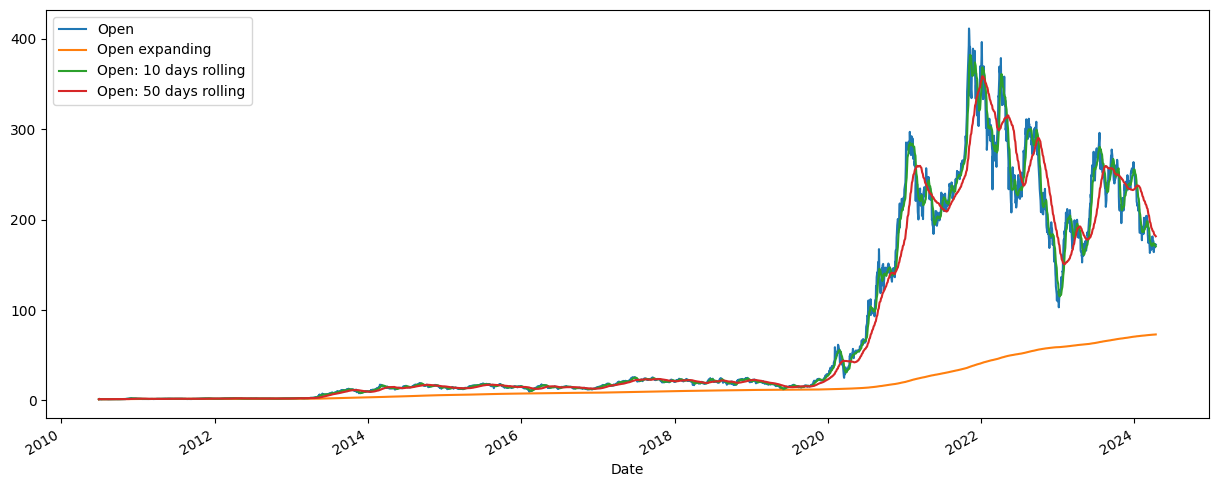

In [36]:
df_tesla[['Open','Open expanding','Open: 10 days rolling','Open: 50 days rolling']].plot(figsize=(15,6))

In [37]:
df_tesla.head(2)

,Open,High,Low,Close,Adj Close,Volume,Open: 10 days rolling,Open: 30 days rolling,Open: 50 days rolling,Open expanding
Date,,,,,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500,1.266667,1.266667,1.266667,1.266667
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500,1.493000,1.493000,1.493000,1.493000


## Exponential Moving Average
### Let's say the smoothning factor is 0.1

In [39]:
df_tesla['EMA_0.1'] = df_tesla['Open'].ewm(alpha=0.1,adjust=False).mean()

<Axes: xlabel='Date'>

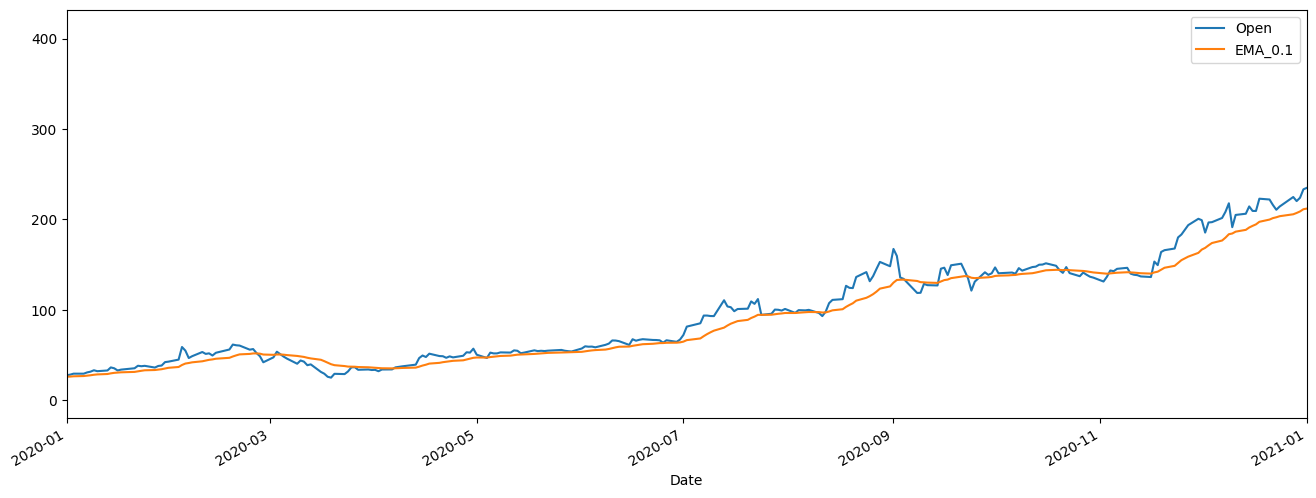

In [40]:
df_tesla[['Open','EMA_0.1']].plot(xlim=['2020-01-01','2021-01-01'],figsize=(16,6))

<Axes: xlabel='Date'>

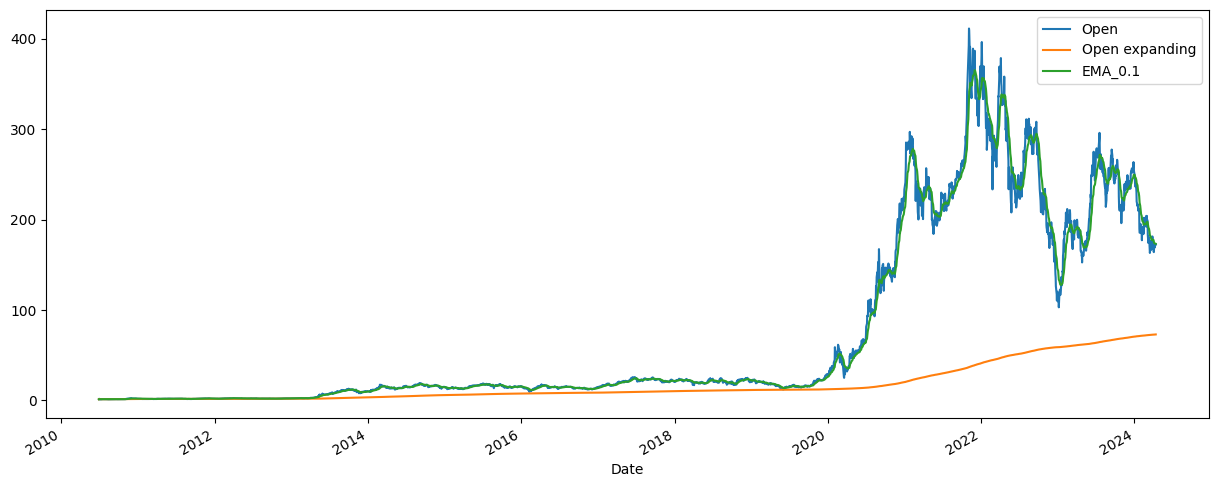

In [45]:
df_tesla[['Open','Open expanding','EMA_0.1']].plot(figsize=(15,6))

In [46]:
df_tesla['EMA_0.3'] = df_tesla['Open'].ewm(alpha=0.3,adjust=False).mean()

<Axes: xlabel='Date'>

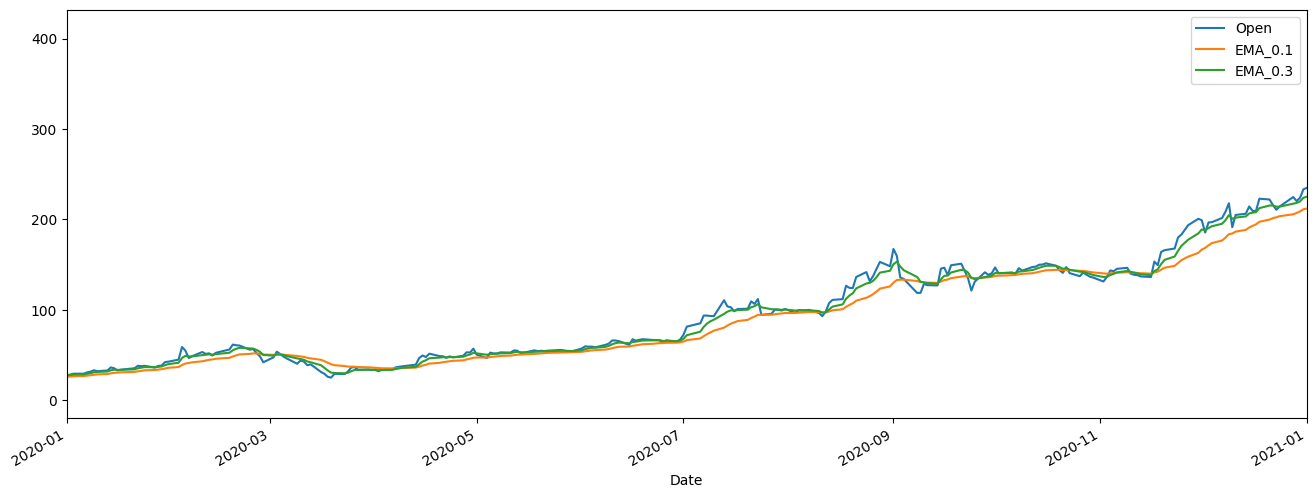

In [48]:
df_tesla[['Open','EMA_0.1','EMA_0.3']].plot(xlim=['2020-01-01','2021-01-01'],figsize=(16,6))

## Exponential Weighted Moving Average

In [49]:
df_tesla['EMA_5days'] = df_tesla['Open'].ewm(span=5).mean()

<Axes: xlabel='Date'>

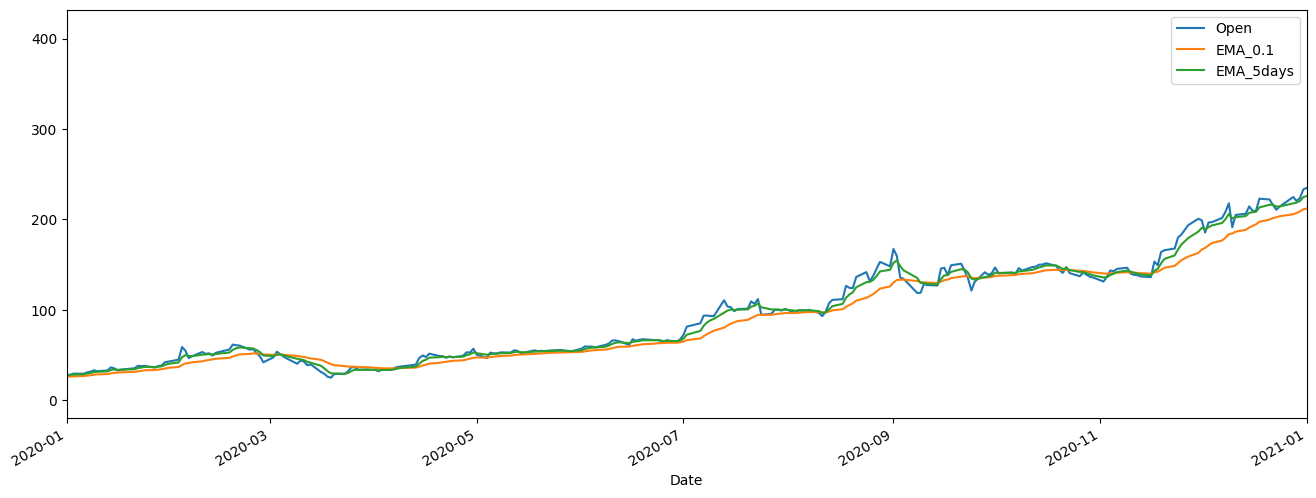

In [51]:
df_tesla[['Open','EMA_0.1','EMA_5days']].plot(xlim=['2020-01-01','2021-01-01'],figsize=(16,6))